# Problem sheet 3
Hanne Hastedt (26014013), Jonas Lührs (23617618), Matteo Meier (21222337)

In [1]:
# necessary imports
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

## Exercise 3.1: Density estimation and countour plot.

In [2]:
# import the numpy array
mat = loadmat('data_points.mat')
data = mat['data']
print(f'The data is of type {type(data)} and has shape {data.shape}')

The data is of type <class 'numpy.ndarray'> and has shape (1000, 2)


In [3]:
# region and number of bins
rng = [-3, 3]
nBins = 100

# bandwidth multiplied with 5 for smoother estimation
kWidth = (rng[1] - rng[0]) / nBins * 5

# meshgrid
xGrid = rng[0] + (rng[1] - rng[0]) * (np.arange(nBins) + 0.5) / nBins 
XGrid, YGrid = np.meshgrid(xGrid, np.flip(xGrid))
XYGrid = np.stack((XGrid.ravel(), YGrid.ravel())).transpose()

# gaussian kernel density estimation
kde = KernelDensity(kernel='gaussian', bandwidth=kWidth).fit(data)
log_dens = kde.score_samples(XYGrid)
dens_estm = np.exp(log_dens).reshape((nBins,nBins))

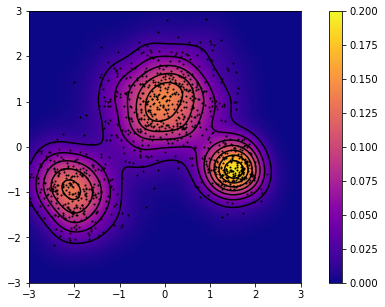

In [7]:
# plotting
fig = plt.subplots(figsize=(10,5))
plt.scatter(data[:,0], data[:,1], s=1, c='k')
ax = plt.gca()
shw = ax.imshow(dens_estm, extent=rng+rng, cmap='plasma', vmin=0, vmax=0.2)
bar = plt.colorbar(shw) 
ax.contour(dens_estm, colors='k', origin='image', extent=rng+rng)
plt.show()